# 2.39 Python Matplotlib Часть 2

In [ ]:
# подключение пакетов
import matplotlib.pyplot as plt,pylab as pl
from matplotlib.lines import Line2D
import numpy as np
from skimage import io,transform

## Композиция графиков

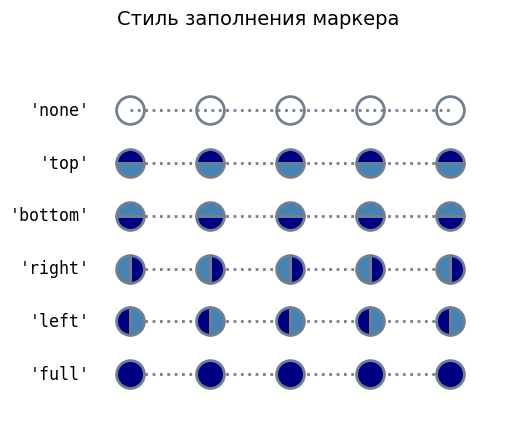

In [ ]:
# сочетание текста и графики
text_style=dict(
    horizontalalignment='right',verticalalignment='center',
    fontsize=12,fontfamily='monospace')
filled_marker_style=dict(
    marker='o',linestyle=':',markersize=20,lw=2,color='slategray',
    markerfacecolor='navy',markerfacecoloralt='steelblue',
    markeredgecolor='slategray',markeredgewidth=2)
def format_axes(ax):
    ax.margins(.2); ax.set_axis_off(); #ax.invert_yaxis()
fig,ax=pl.subplots()
fig.suptitle('Стиль заполнения маркера',fontsize=14)
fig.subplots_adjust(left=.2)
for y,fill_style in enumerate(Line2D.fillStyles):
    ax.text(-.5,y,repr(fill_style),**text_style)
    ax.plot([y]*5,fillstyle=fill_style,**filled_marker_style)
format_axes(ax)

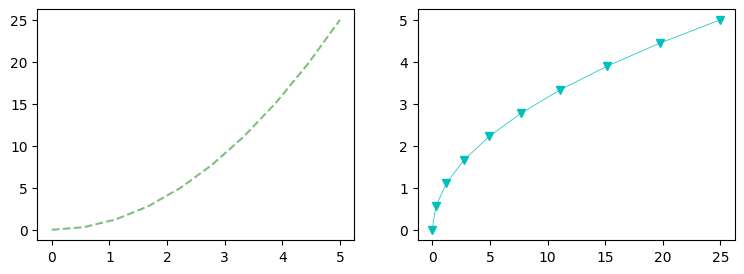

In [ ]:
# минималистичный код для совмещения объектов
x=np.linspace(0,5,10); y=x**2
fig=pl.figure(figsize=(9,3))
pl.subplot(1,2,1); pl.plot(x,y,'g--',alpha=.5)
pl.subplot(1,2,2); pl.plot(y,x,'cv-',lw=.5);

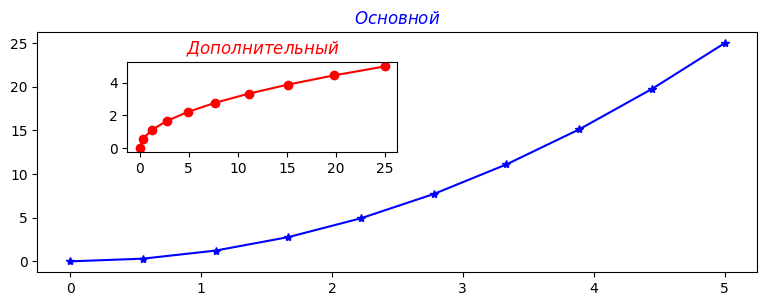

In [ ]:
# дополнительные объекты внутри основного
fig=pl.figure(figsize=(9,3))
# left, bottom, width, height
ax1=fig.add_axes([.1,.1,.8,.8])
ax2=fig.add_axes([.2,.5,.3,.3])
ax1.plot(x,y,'b*-')
ax1.set_title('$Основной$',color='blue')
ax2.plot(y,x,'ro-')
ax2.set_title('$Дополнительный$',color='red');

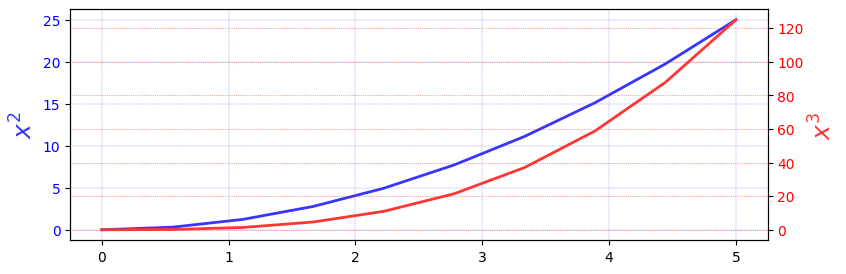

In [ ]:
# сравнение двух графиков
fig,ax1=pl.subplots(figsize=(9,3))
ax1.plot(x,x**2,lw=2,color="#3636ff")
ax1.set_ylabel('$x^2$',fontsize=18,color="#3636ff")
for label in ax1.get_yticklabels():
    label.set_color("blue")
ax1.grid(color='b',alpha=.5,linestyle='dashed',linewidth=.3)
ax2=ax1.twinx()
ax2.plot(x,x**3,lw=2,color="#ff3636")
ax2.set_ylabel('$x^3$',fontsize=18,color="#ff3636")
for label in ax2.get_yticklabels():
    label.set_color("red")
ax2.grid(color='r',alpha=.7,linestyle='dotted',linewidth=.5);

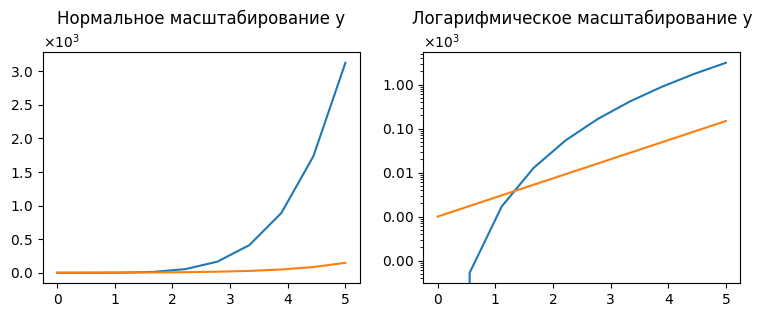

In [ ]:
# масштабирование графиков
fig,ax=pl.subplots(1,2,figsize=(9,3))
[ax[i].plot(x,x**5,x,np.exp(x)) for i in [0,1]]
ax[0].set_title("Нормальное масштабирование у")
ax[1].set_yscale("log")
ax[1].set_title("Логарифмическое масштабирование y");
from matplotlib import ticker
formatter=ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,3))
[ax[i].yaxis.set_major_formatter(formatter)  for i in [0,1]];

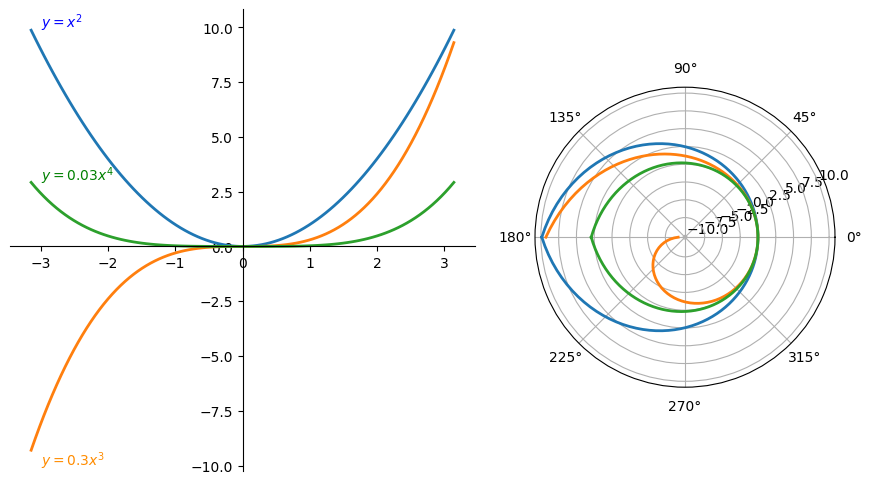

In [ ]:
# отображение осей и систем координат
fig,ax1=pl.subplots(figsize=(6,6))
ax2=fig.add_axes([1.,.25,.5,.5],polar=True)
t=np.linspace(-np.pi,np.pi,100)
for ax in [ax1,ax2]:
    ax.plot(t,t**2,t,.3*t**3,t,.03*t**4,lw=2)
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['bottom'].set_position(('data',0))
ax1.yaxis.set_ticks_position('left')
ax1.spines['left'].set_position(('data',0))
for side in ['right','top']:
    ax1.spines[side].set_color('none')
# текстовые пометки
ax1.text(-3,10,r"$y=x^2$",fontsize=10,color="blue")
ax1.text(-3,-10,r"$y=0.3x^3$",fontsize=10,color="darkorange")
ax1.text(-3,3,r"$y=0.03x^4$",fontsize=10,color="green");

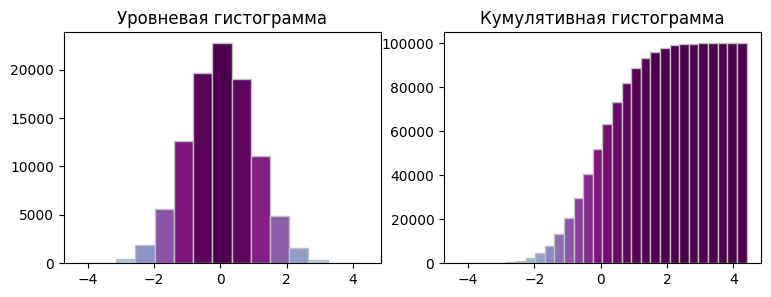

In [ ]:
# концентрация информации при совмещении графиков
from matplotlib.colors import Normalize
def color_hist(
    h,arr,bins,title,cumulative=False,edgecolor='silver'):
    n,bins,patches=h.hist(
        arr,bins=bins,cumulative=cumulative,edgecolor=edgecolor)
    fracs=((n**(1/5))/n.max())
    norm=Normalize(fracs.min(),fracs.max())
    for frac,patch in zip(fracs,patches):
        color=pl.cm.BuPu(norm(frac))
        patch.set_facecolor(color)
    h.set_title(title)
    h.set_xlim((1.1*min(arr),1.1*max(arr)))
arr=np.random.randn(100_000)
fig,ax=pl.subplots(1,2,figsize=(9,3))
color_hist(ax[0],arr,bins=15,title="Уровневая гистограмма")
color_hist(ax[1],arr,bins=30,cumulative=True,
           title="Кумулятивная гистограмма");

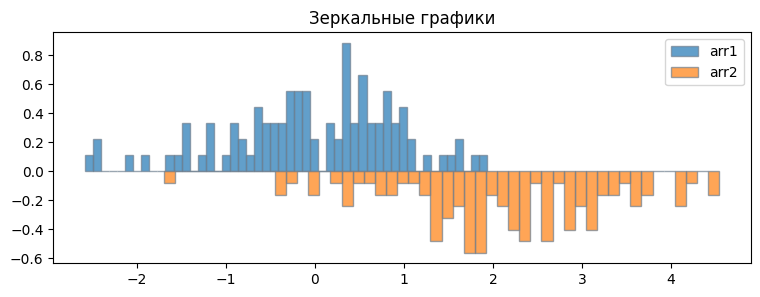

In [ ]:
# способ визуального сравнения величин
arr1=np.random.normal(size=100)
arr2=np.random.normal(loc=2,size=100)*-1
fig=pl.figure(1,figsize=(9,3))
pl.title('Зеркальные графики')
def mirror_hist(
    arr,k=1,density=True,n_bins=50,
    edgecolor='slategray',alpha=.7,label=''):
    heights,bins=np.histogram(arr,density=density,bins=n_bins)
    heights*=k
    bin_width=np.diff(bins)[0]
    bin_pos=(bins[:-1]+bin_width/2)*-1
    pl.bar(bin_pos,heights,width=bin_width,
           edgecolor=edgecolor,alpha=alpha,label=label)
    pl.legend();
mirror_hist(arr1,label='arr1')
mirror_hist(arr2,k=-1,label='arr2')

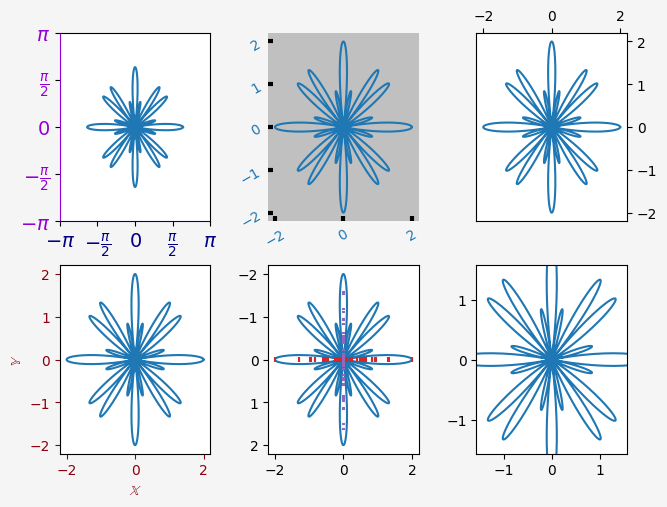

In [ ]:
# "вольное обращение" с окружающей средой
t=np.linspace(0,2*np.pi,1000)
f=np.cos(14*t)+np.cos(6*t)
x=f*np.cos(t); y=f*np.sin(t)
fig,ax=pl.subplots(2,3)
fig.tight_layout()
rect=fig.patch
rect.set_facecolor('whitesmoke')
for a in ax.flatten(): a.plot(x,y)
ticks=[[-np.pi,-np.pi/2,0,np.pi/2,np.pi],
       [r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$\frac{\pi}{2}$',r'$\pi$']]
# форматирование разметки и цвета осей
ax[0,0].set_xticks(ticks[0])
ax[0,0].spines['bottom'].set_color('navy')
ax[0,0].set_xticklabels(ticks[1],fontsize=14,color='navy')
ax[0,0].set_yticks(ticks[0])
ax[0,0].spines['left'].set_color('#9400d3') # hex notation
ax[0,0].set_yticklabels(ticks[1],fontsize=14,color='#9400d3')
# сделать оси координат невидимыми
for side in ['left','top','right','bottom']:
    ax[0,1].spines[side].set_color('none')
# фон внутри координатной сетки и форматирование разметки
ax[0,1].set_facecolor('silver') # html notation
ax[0,1].tick_params(direction='in',width=3,rotation=30,
                    labelcolor='tab:blue') # tab notation
# перенос разметки осей
ax[0,2].yaxis.tick_right(); ax[0,2].xaxis.tick_top()
# названия и цвет разметки осей
ax[1,0].set_xlabel("$\mathbb{X}}$",color='xkcd:crimson')
ax[1,0].set_ylabel("$\mathbb{Y}}$",color='xkcd:crimson')
ax[1,0].tick_params(colors='xkcd:crimson') # xkcd notation
# специальная разметка (по значениям данных)
from matplotlib.collections import EventCollection
xevents=EventCollection(x[::20],color='C3',linelength=.1) # C notation
yevents=EventCollection(
    y[::20],color='C4',linelength=.1,orientation='vertical')
ax[1,1].add_collection(xevents)
ax[1,1].add_collection(yevents)
ax[1,1].invert_yaxis() # другое направление оси
# ограничения осей
ax[1,2].set_ylim([-np.pi/2,np.pi/2])
ax[1,2].set_xlim([-np.pi/2,np.pi/2]);

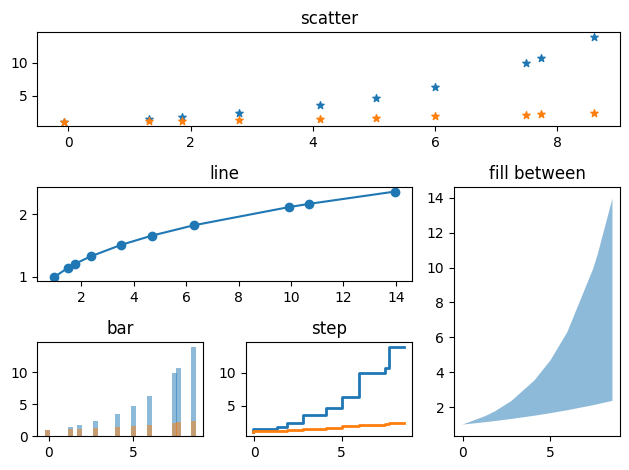

In [ ]:
# "сетка" графиков двух функций
n=np.sort(np.array(range(10))+.5*np.random.randn(10))
fn1,fn2=np.exp(n)*.5**n,np.exp(n)**.1
fig=pl.figure()
ax1=pl.subplot2grid((3,3),(0,0),colspan=3)
ax1.set_title("scatter")
ax2=pl.subplot2grid((3,3),(1,0),colspan=2)
ax2.plot(fn1,fn2,'o-')
ax2.set_title("line")
ax3=pl.subplot2grid((3,3),(1,2),rowspan=2)
ax3.fill_between(n,fn1,fn2,alpha=.5)
ax3.set_title("fill between")
ax4=pl.subplot2grid((3,3),(2,0))
ax4.set_title("bar")
ax5=pl.subplot2grid((3,3),(2,1))
ax5.set_title("step")
for fn in [fn1,fn2]:
    ax1.scatter(n,fn,s=30,marker='*')
    ax4.bar(n,fn,align="center",width=.3,alpha=.5)
    ax5.step(n,fn,lw=2)
fig.tight_layout()

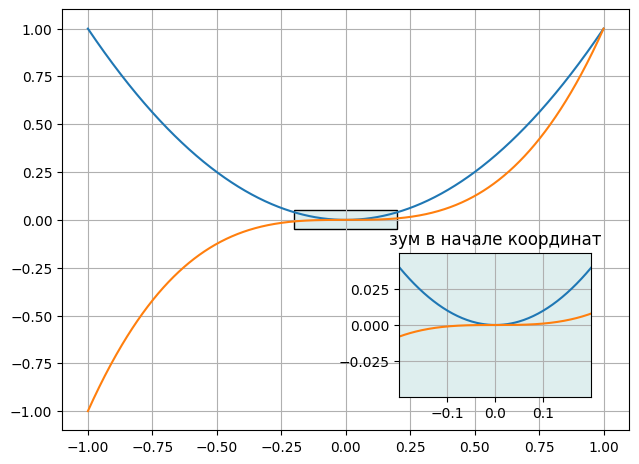

In [ ]:
# "простой зум"
import matplotlib.patches as patches
x=np.linspace(-1,1,1000)
fig,main_ax=pl.subplots(); fig.tight_layout()
insert_ax=fig.add_axes([.6,.15,.3,.3]) # x, y, width, height
for ax in [main_ax,insert_ax]:
    ax.plot(x,x**2,x,x**3)
    ax.grid()
main_ax.add_patch(patches.Rectangle(
    (-.2,-.05),.4,.1,edgecolor='black',facecolor='#deeeee'))
insert_ax.set_title('зум в начале координат')
insert_ax.set_xlim(-.2,.2); insert_ax.set_ylim(-.05,.05)
insert_ax.set_xticks([-.1,0,.1])
insert_ax.set_yticks([-.025,0,.025])
insert_ax.set_facecolor('#deeeee');

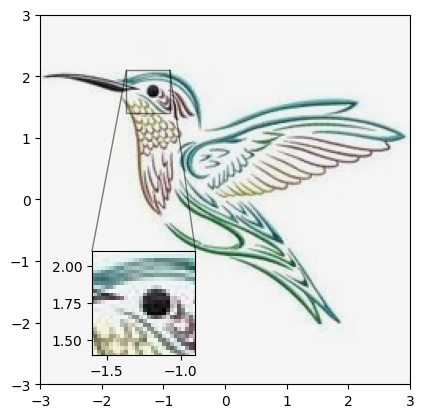

In [ ]:
# еще один вариант зума
file_path='https://raw.githubusercontent.com/'+\
          'OlgaBelitskaya/data/main//pictograms/'
file_name='00_02_005.png'
img=io.imread(file_path+file_name)[:,:,:3]
extent=(-3,3,-3,3)
fig,main_ax=pl.subplots()
ins_ax=main_ax.inset_axes([.14,.08,.28,.28])
for ax in [main_ax,ins_ax]:
    ax.imshow(img,extent=extent)
x1,x2,y1,y2=-1.6,-.9,1.4,2.1
ins_ax.set_xlim(x1,x2); ins_ax.set_ylim(y1,y2)
main_ax.indicate_inset_zoom(ins_ax,edgecolor="black");

## Численные массивы изображений

(346, 346) (376, 376)
{0.0, 1.0}


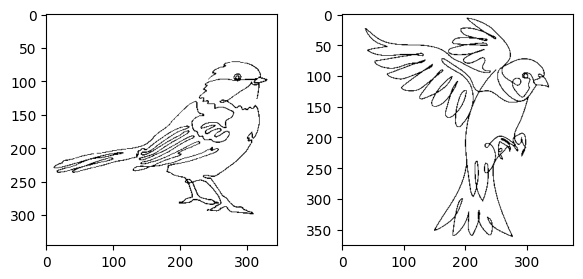

In [ ]:
file_path='https://raw.githubusercontent.com/'+\
          'OlgaBelitskaya/data/main/pictograms/'
file_name1,file_name2='02_02_003.png','02_02_004.png'
# перевод рисунков в массив чисел (оттенки серого)
img1=io.imread(file_path+file_name1)
img2=io.imread(file_path+file_name2)
imgbw1,imgbw2=np.ones(img1.shape[:2]),np.ones(img2.shape[:2])
print(imgbw1.shape,imgbw2.shape)
# черно-белые массивы чисел (0 и 1)
imgbw1[img1[:,:,1] < 128],imgbw2[img2[:,:,1] < 127]=0,0
fig,ax=pl.subplots(1,2,figsize=(7,3))
ax[0].imshow(imgbw1,cmap='gray')
ax[1].imshow(imgbw2,cmap='gray')
print(set(imgbw1.flatten().tolist()))

(2, 4174) (2, 6110)
(2, 4174) (2, 4174)


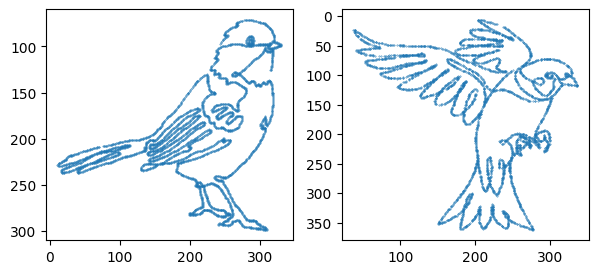

In [ ]:
# координаты - пары индексов, где пиксели черного цвета
coord1=np.array(np.where(imgbw1==0))
coord2=np.array(np.where(imgbw2==0))
# пар координат у второго рисунка больше
print(coord1.shape,coord2.shape)
# случайным образом удаляем пары координат второго рисунка
# чтобы количество точек стало равным
while not coord2.shape==coord1.shape:
    randi=np.random.randint(
        0,coord2.shape[1]-1,coord2.shape[1]-coord1.shape[1])
    coord2=np.delete(coord2,list(randi),axis=1)
print(coord1.shape,coord2.shape)
fig,ax=pl.subplots(1,2,figsize=(7,3))
ax[0].scatter(coord1[1,:],coord1[0,:],s=.1)
ax[0].invert_yaxis()
ax[1].scatter(coord2[1,:],coord2[0,:],s=.1)
ax[1].invert_yaxis();

In [ ]:
# интерполяция: каждая координата одного рисунка
# по плавной траектории переходит в координату другого рисунка
def interpolate(coord1,coord2,steps=11):
    v1norm=np.linalg.norm(coord1)
    v2norm=np.linalg.norm(coord2)
    vectors=[]; v2normalized=coord2*(v1norm/v2norm)
    for step in range(0,steps+1):
        interpolated=coord1+(v2normalized-coord1)*step/steps
        interpolated_norm=np.linalg.norm(interpolated)
        interpolated_normalized=interpolated*(v1norm/interpolated_norm)
        vectors.append(interpolated_normalized)
    return np.array(vectors,dtype='int32')
# двойная интерполяция: первый рисунок во второй и обратно
vectors=np.vstack([interpolate(coord1,coord2),interpolate(coord2,coord1)])
vectors.shape

(24, 2, 4174)

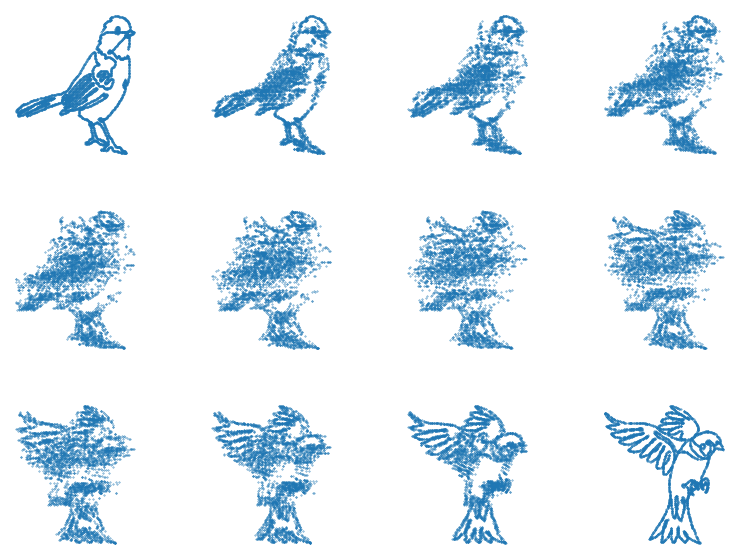

In [ ]:
# пошаговое отображение процесса
fig,ax=pl.subplots(3,4,figsize=(8,6))
fig.tight_layout()
for i in range(0,12):
    ax[i//4,i%4].scatter(vectors[i,1,:],vectors[i,0,:],s=.1)
    ax[i//4,i%4].invert_yaxis()
    ax[i//4,i%4].set_axis_off()

In [ ]:
# перевод координат в пиксельное изображение
imgs=np.ones(
    [vectors.shape[0],vectors.max()+vectors.min(),vectors.max()+vectors.min()])
for i in range(imgs.shape[0]):
    for j in range(vectors.shape[2]):
        imgs[i][vectors[i,0,j],vectors[i,1,j]]=0

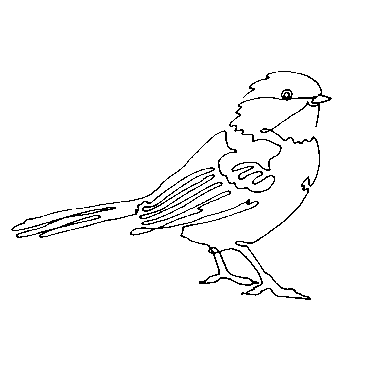

In [ ]:
import imageio
from IPython.display import display,Image
imgs1=np.array(255*imgs,dtype=np.uint8)
imageio.mimsave('pic.gif',imgs1)
display(Image('pic.gif'))